In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import cm
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import FuncFormatter
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
from IPython.display import clear_output

from scipy.signal import savgol_filter

plt.rcParams['figure.figsize']=[18,12]

%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from matplotlib.dates import date2num

In [59]:
#read csv
df = pd.read_csv("RVI_16_17.csv")

In [60]:
#drop null values
df= df.dropna()
df

,Date,irrigated,rainfed
2,2016-11-17,0.677340,0.481331
3,2016-11-18,0.791740,0.796654
4,2016-11-19,1.032159,0.344272
8,2016-11-23,0.410977,0.523962
9,2016-11-24,0.637412,1.192958
...,...,...,...
249,2017-07-22,0.604389,0.711370
250,2017-07-23,0.391168,1.119596
254,2017-07-27,0.816882,0.711442
255,2017-07-28,0.525714,0.475541


In [61]:
#format date
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

date = df['Date'].to_list()

In [123]:
#smoothing using savitzki golay
df1 = df['irrigated'].to_list()
df_flt1 = savgol_filter(df1, window_length=25, polyorder=1)


df2 = df['rainfed'].to_list()
df_flt2 = savgol_filter(df2, window_length=25, polyorder=1)

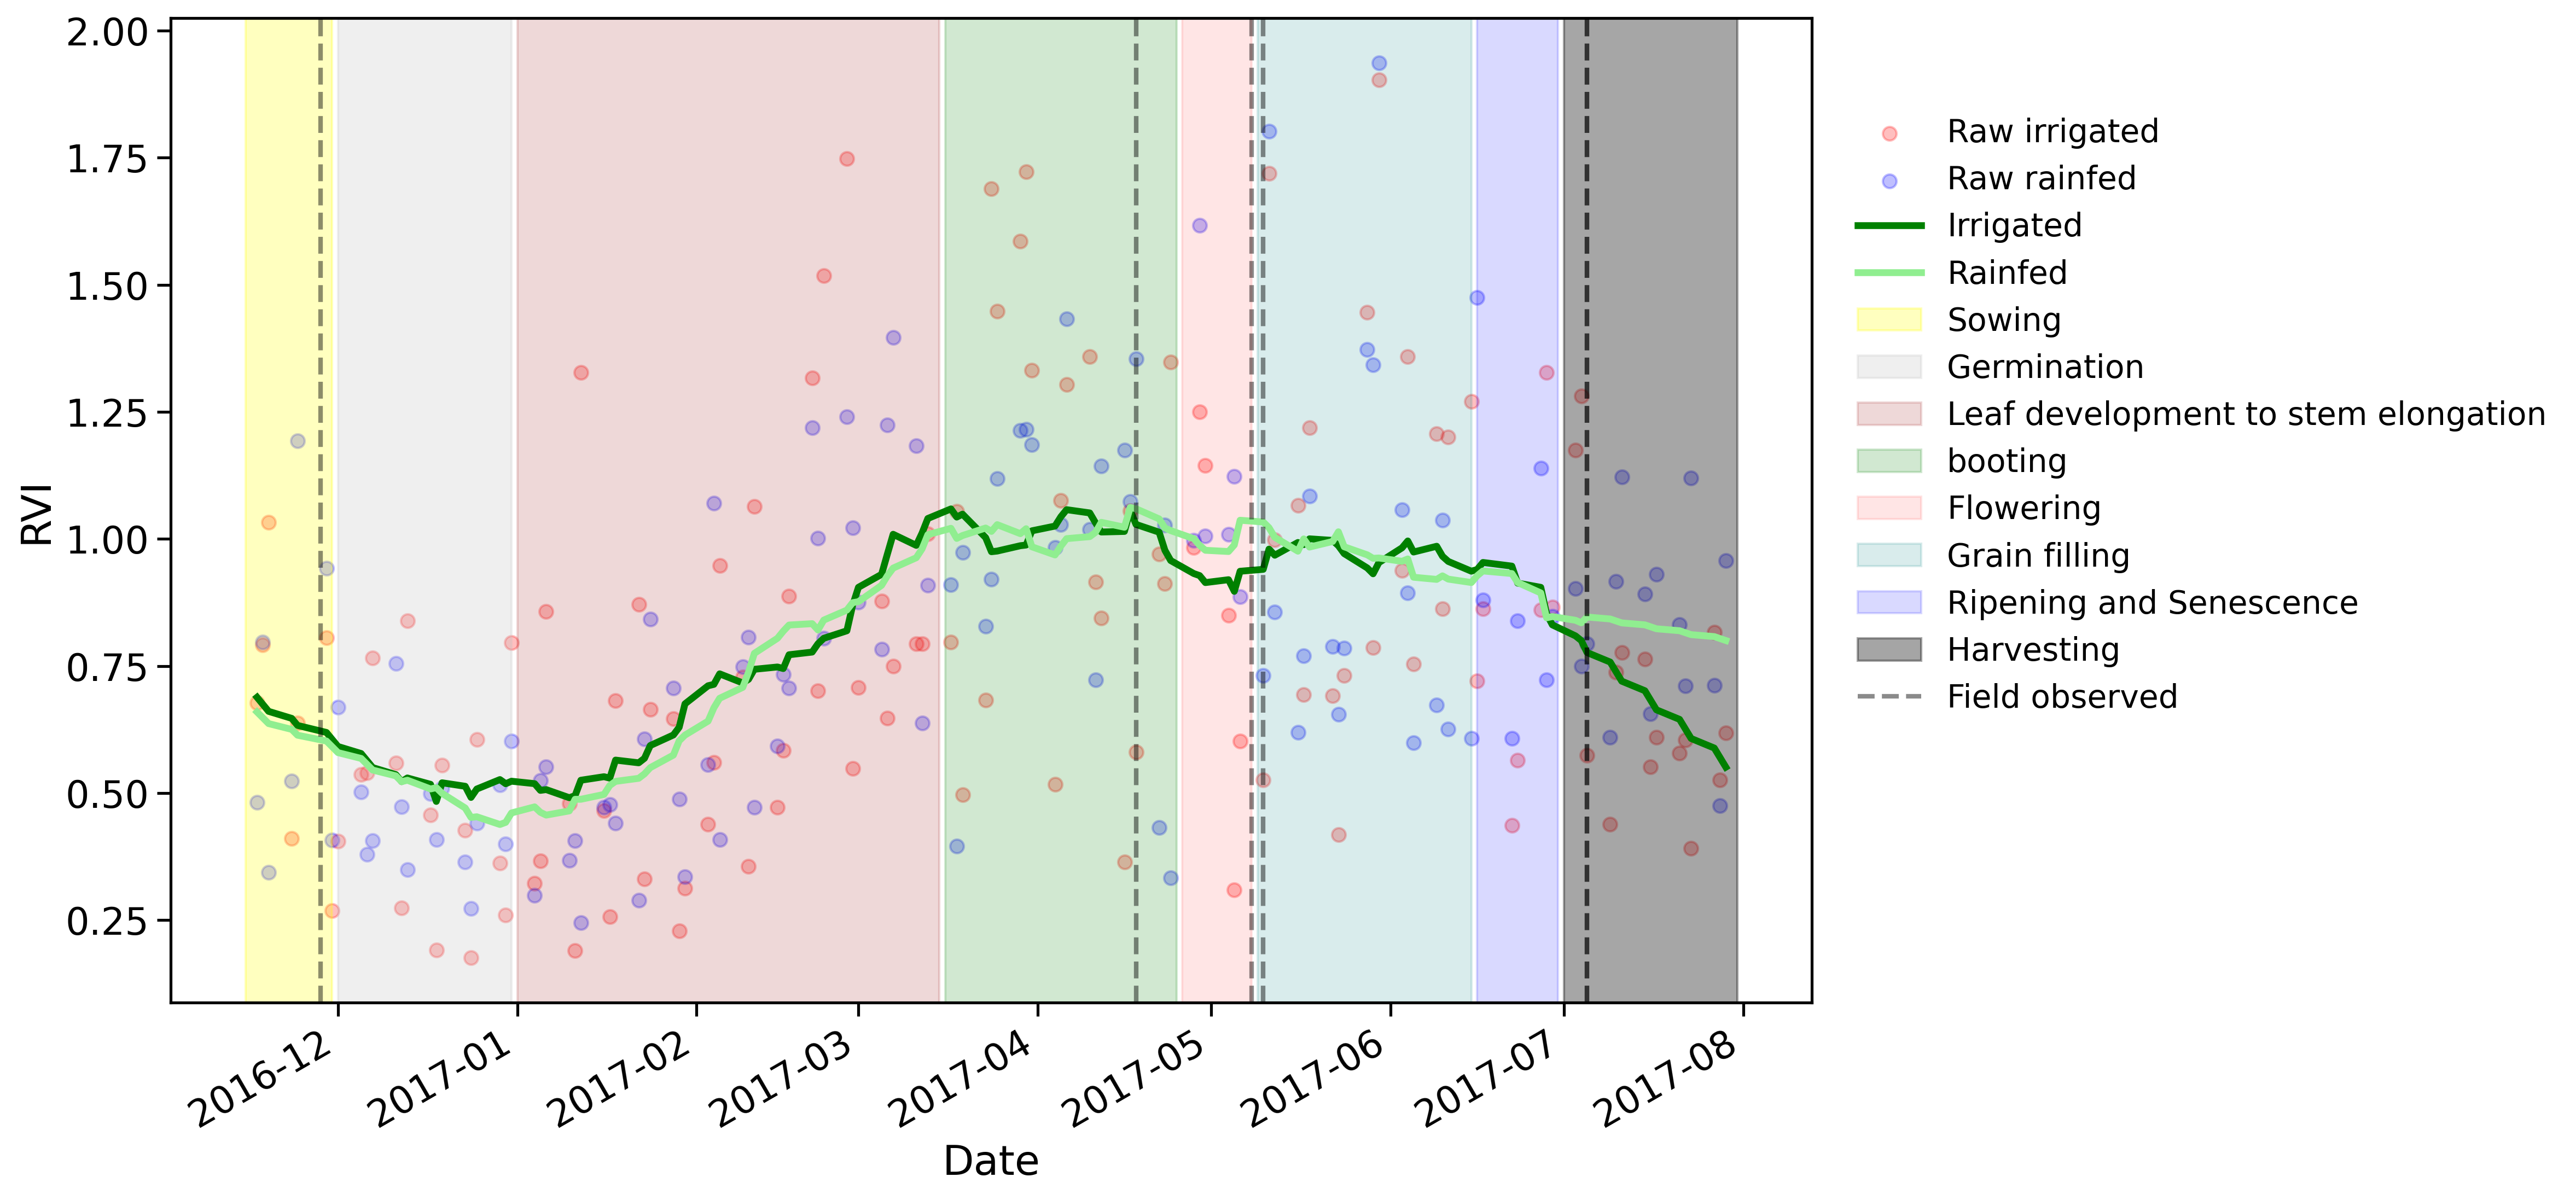

In [124]:
fig = plt.figure(figsize=(10.0, 6.0), dpi=150)


# define axes on the figure to take up the entire figure canvas
ax = fig.add_axes([0, 0, 1, 1])

# plot the raw against the axes
ax.scatter(date, df1, color='red', marker='o', alpha=0.25, label='Raw irrigated' )
ax.scatter(date, df2, color='blue', marker='o', alpha=0.25, label='Raw rainfed' )

# plot the smoothened against the axes
ax.plot(date, df_flt1, color='green', marker='.', linestyle='-', linewidth= 3,  markersize=0, label='Irrigated')
ax.plot(date, df_flt2, color='lightgreen', marker='.', linestyle='-', linewidth= 3,  markersize=0, label='Rainfed')


# colorful breaks
ax.axvspan(date2num(datetime(2016,11,15)), date2num(datetime(2016,11,30)), 
           label="Sowing",color="yellow", alpha=0.25)

ax.axvspan(date2num(datetime(2016,12, 1)), date2num(datetime(2016,12,31)), 
           label="Germination ",color="silver", alpha=0.25)


ax.axvspan(date2num(datetime(2017,1,1)), date2num(datetime(2017,3,15)), 
           label="Leaf development to stem elongation",color="brown", alpha=0.18)


ax.axvspan(date2num(datetime(2017,3,16)), date2num(datetime(2017,4,25)), 
           label="booting",color="green", alpha=0.18)

ax.axvspan(date2num(datetime(2017,4,26)), date2num(datetime(2017,5,8)), 
           label="Flowering",color="red", alpha=0.10)

ax.axvspan(date2num(datetime(2017,5,9)), date2num(datetime(2017,6,15)),
            label= "Grain filling", color="teal", alpha=0.15)

ax.axvspan(date2num(datetime(2017,6,16)), date2num(datetime(2017,6,30)),
            label= "Ripening and Senescence", color="blue", alpha=0.15)

ax.axvspan(date2num(datetime(2017,7,1)), date2num(datetime(2017,7,31)), 
           label="Harvesting ",color="black", alpha=0.35)


#add customized vertical line at 1/5/2023
import datetime as dt

plt.axvline(dt.datetime(2016, 11, 28), color='black', alpha=0.45, linewidth=2, linestyle='--')
plt.axvline(dt.datetime(2017, 4, 18), color='black', alpha=0.45, linewidth=2, linestyle='--')
plt.axvline(dt.datetime(2017, 5, 8), color='black', alpha=0.45, linewidth=2, linestyle='--')
plt.axvline(dt.datetime(2017, 5, 10), color='black', alpha=0.45, linewidth=2, linestyle='--')
plt.axvline(dt.datetime(2017, 7, 5), color='black', alpha=0.45, linewidth=2, linestyle='--')
ax.axvline(dt.datetime(2017, 7, 5), color='black', alpha=0.45, linewidth=2, linestyle='--', label="Field observed")


#Autodate format
plt.gcf().autofmt_xdate()

# label the axes and title the plot
ax.set_xlabel('Date')
ax.set_ylabel('RVI')
# ax.set_title('Sentinel 1 Backscatter Timeseries for a Point')

#Add legend
#plt.legend(loc='upper right')

ax.legend(loc = (1.02, 0.28), frameon = False, prop={'size': 14})

In [121]:
max(df_flt1)

1.1070582380476188

In [120]:
min(df_flt2)

0.42427192714285705

In [105]:
df_flt1

array([0.71542163, 0.6977653 , 0.68010898, 0.66245265, 0.64479633,
       0.62714001, 0.60948368, 0.59182736, 0.57417103, 0.55651471,
       0.53885838, 0.51897904, 0.51920184, 0.48540697, 0.48329763,
       0.4937824 , 0.4782641 , 0.47452122, 0.5184464 , 0.51510237,
       0.50162272, 0.49759196, 0.51244092, 0.51516879, 0.50687752,
       0.51585623, 0.51763563, 0.50611595, 0.50672816, 0.52505527,
       0.54132551, 0.55876692, 0.56332121, 0.57604883, 0.58316748,
       0.59351066, 0.59493714, 0.63479073, 0.6591173 , 0.66815257,
       0.72923251, 0.74311203, 0.74436372, 0.74470227, 0.75979727,
       0.76381142, 0.77084959, 0.79779676, 0.8310035 , 0.84803447,
       0.87155288, 0.8501023 , 0.84794588, 0.91145363, 0.92974725,
       0.98278431, 1.03700119, 1.05816833, 1.02011024, 1.03793391,
       1.02773801, 1.0091832 , 1.02664904, 1.03314652, 1.00865888,
       1.0280355 , 1.02002197, 1.02842615, 1.03403398, 1.05012203,
       1.05897418, 1.06828632, 1.09910582, 1.10705824, 1.04136

In [109]:
type(date)

list

In [117]:
# Specify the file path where you want to save the CSV file
file_path = "file2.csv"

# Export the data to a CSV file
np.savetxt(file_path, df_flt2, delimiter=',')

In [116]:
# Export the DataFrame to a CSV file
#df.to_csv('df_raw.csv', index=False)